## Exploratory Data Analysis

In this notebook, I will be performing Exploratory Data Analysis on my Dataset to understand the Dataset in hand in depth and understand the basic patterns and trends.

### Data Import

In [19]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
fdf3 = pd.read_pickle('data1/fdf3.pkl')

### Univariate Analysis

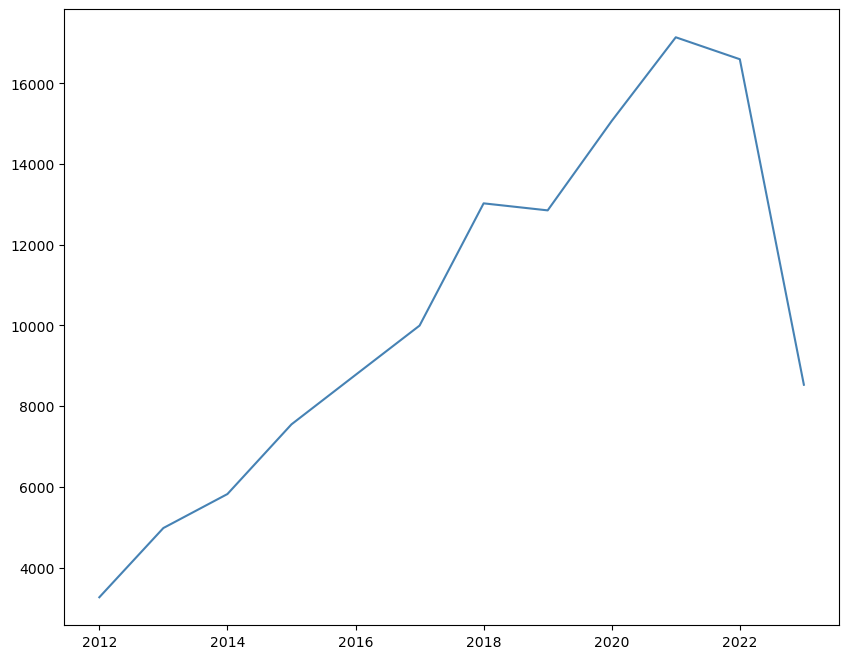

In [43]:
#plot every data point for each year
plt.figure(figsize=(10,8))
fdf3["year"].value_counts().sort_index().plot(color="steelblue")
plt.show()

This is the graph that represents the total number of datapoints in my dataset. As we can see we have a lot of datapoints for the later years and not a lot of data for the earlier years. This may prove to be an issue as time goes on.


### Distribution of my continuous data

**Market Value distribution plots**

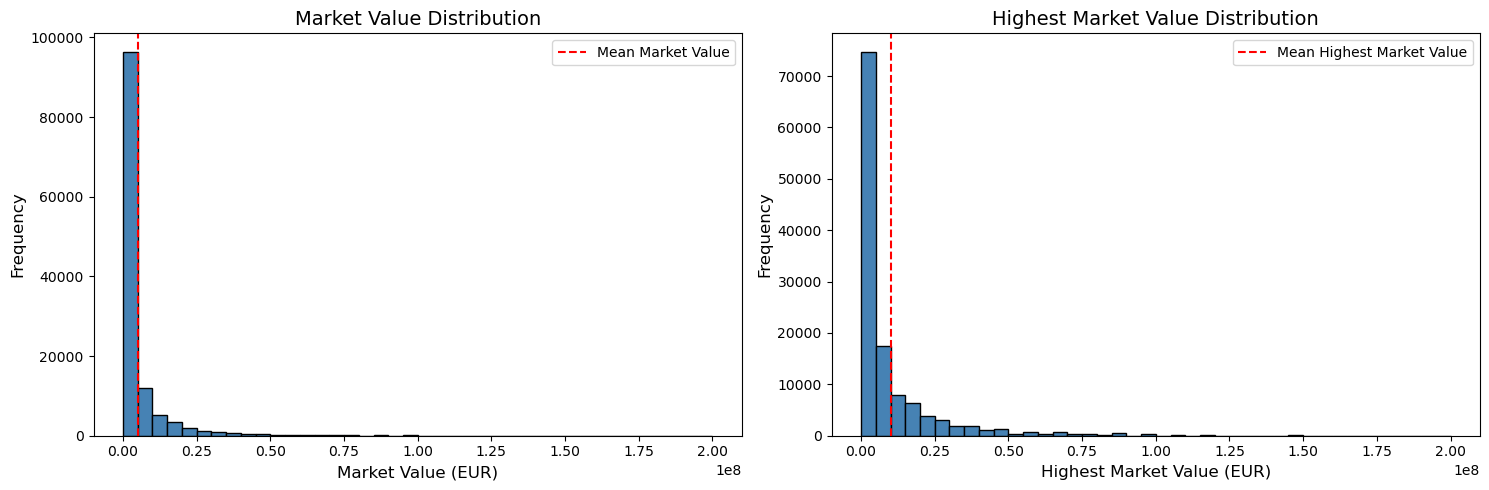

In [96]:

#create a 1x2 subplot grid
plt.subplots(1, 2, figsize=(15, 5))

# Market Value
plt.subplot(1, 2, 1)
plt.hist(fdf3["market_value"], bins=40, color="steelblue", edgecolor="black")
plt.axvline(fdf3["market_value"].mean(), color="red", linestyle="--", label="Mean Market Value")
plt.xlabel("Market Value (EUR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Market Value Distribution", fontsize=14)
plt.legend()

# Highest Market Value
plt.subplot(1, 2, 2)
plt.hist(fdf3["highest_ever_market_value"], bins=40, color="steelblue", edgecolor="black")
plt.axvline(fdf3["highest_ever_market_value"].mean(), color="red", linestyle="--", label="Mean Highest Market Value")
plt.xlabel("Highest Market Value (EUR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Highest Market Value Distribution", fontsize=14)
plt.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplots
plt.show()



* First plot represents my target variable, the constantly changing market value feature in my dataset. 
* Second plot represents the peak of a players value across all their entries in my dataset.

**Physical Attributes**

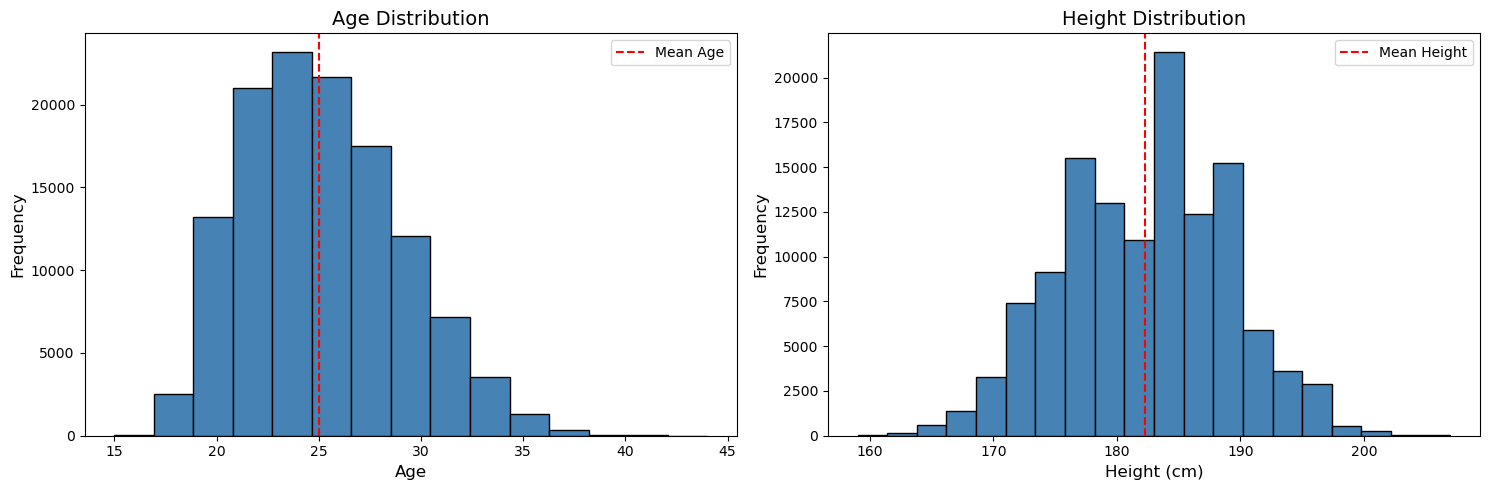

In [94]:
#create a suplot
plt.subplots(1, 2, figsize=(15, 5))

#age
plt.subplot(1, 2, 1)
#set up histogram
plt.hist(fdf3["age"], bins=15, color="steelblue", edgecolor="black")
#add mean line
plt.axvline(fdf3["age"].mean(), color="red", linestyle="--", label="Mean Age")
#add labels
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
#add title
plt.title("Age Distribution", fontsize=14)
plt.legend()

#height
plt.subplot(1, 2, 2)
#set up histogram
plt.hist(fdf3["height_in_cm"], bins=20, color="steelblue", edgecolor="black")
#add mean line
plt.axvline(fdf3["height_in_cm"].mean(), color="red", linestyle="--", label="Mean Height")
#add labels

plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
#add title
plt.title("Height Distribution", fontsize=14)
plt.legend()

plt.tight_layout()

# Show the subplots
plt.show()


`age`: In the age histogram, the mean sits at almost exactly 25 indicating that thats the average footballer age in my dataset. It takes a normally distributed shape with a slightly right skew which deos make logical sense as football players are more often "young" then they are "old". This could act as a hugely important feature in predicting market value as young players in general tend to be more valued by football clubs as they have a lot more years ahead of them. If a player is 25 and majority of players retire between 35-40 we can assume that, barring injuries, that player has 10-15 years left of career time. Contrastingly, if we have a player aged 35 with identical statistics in every other metric as the 25-year-old, it would be wise to expect that the younger player would hold considerably higher value due to the finite time remaining in the career of the 35-year-old.

`height`: The height histogram also loosely follows that normally distributed shape except that the mode falls very far from the mean. It looks ever so slightly left skewed. The mean seems to sit at the 180-185 height range suggesting that that is the average height of a footballer. Although likely not as important as age as a predictor, it could be very important. For example, In general, taller defenders, goalkeepers & defensive midfielders are preferred to smaller ones and so we can make the base assumption that they would have a higher market value.

**Yearly Player stats**

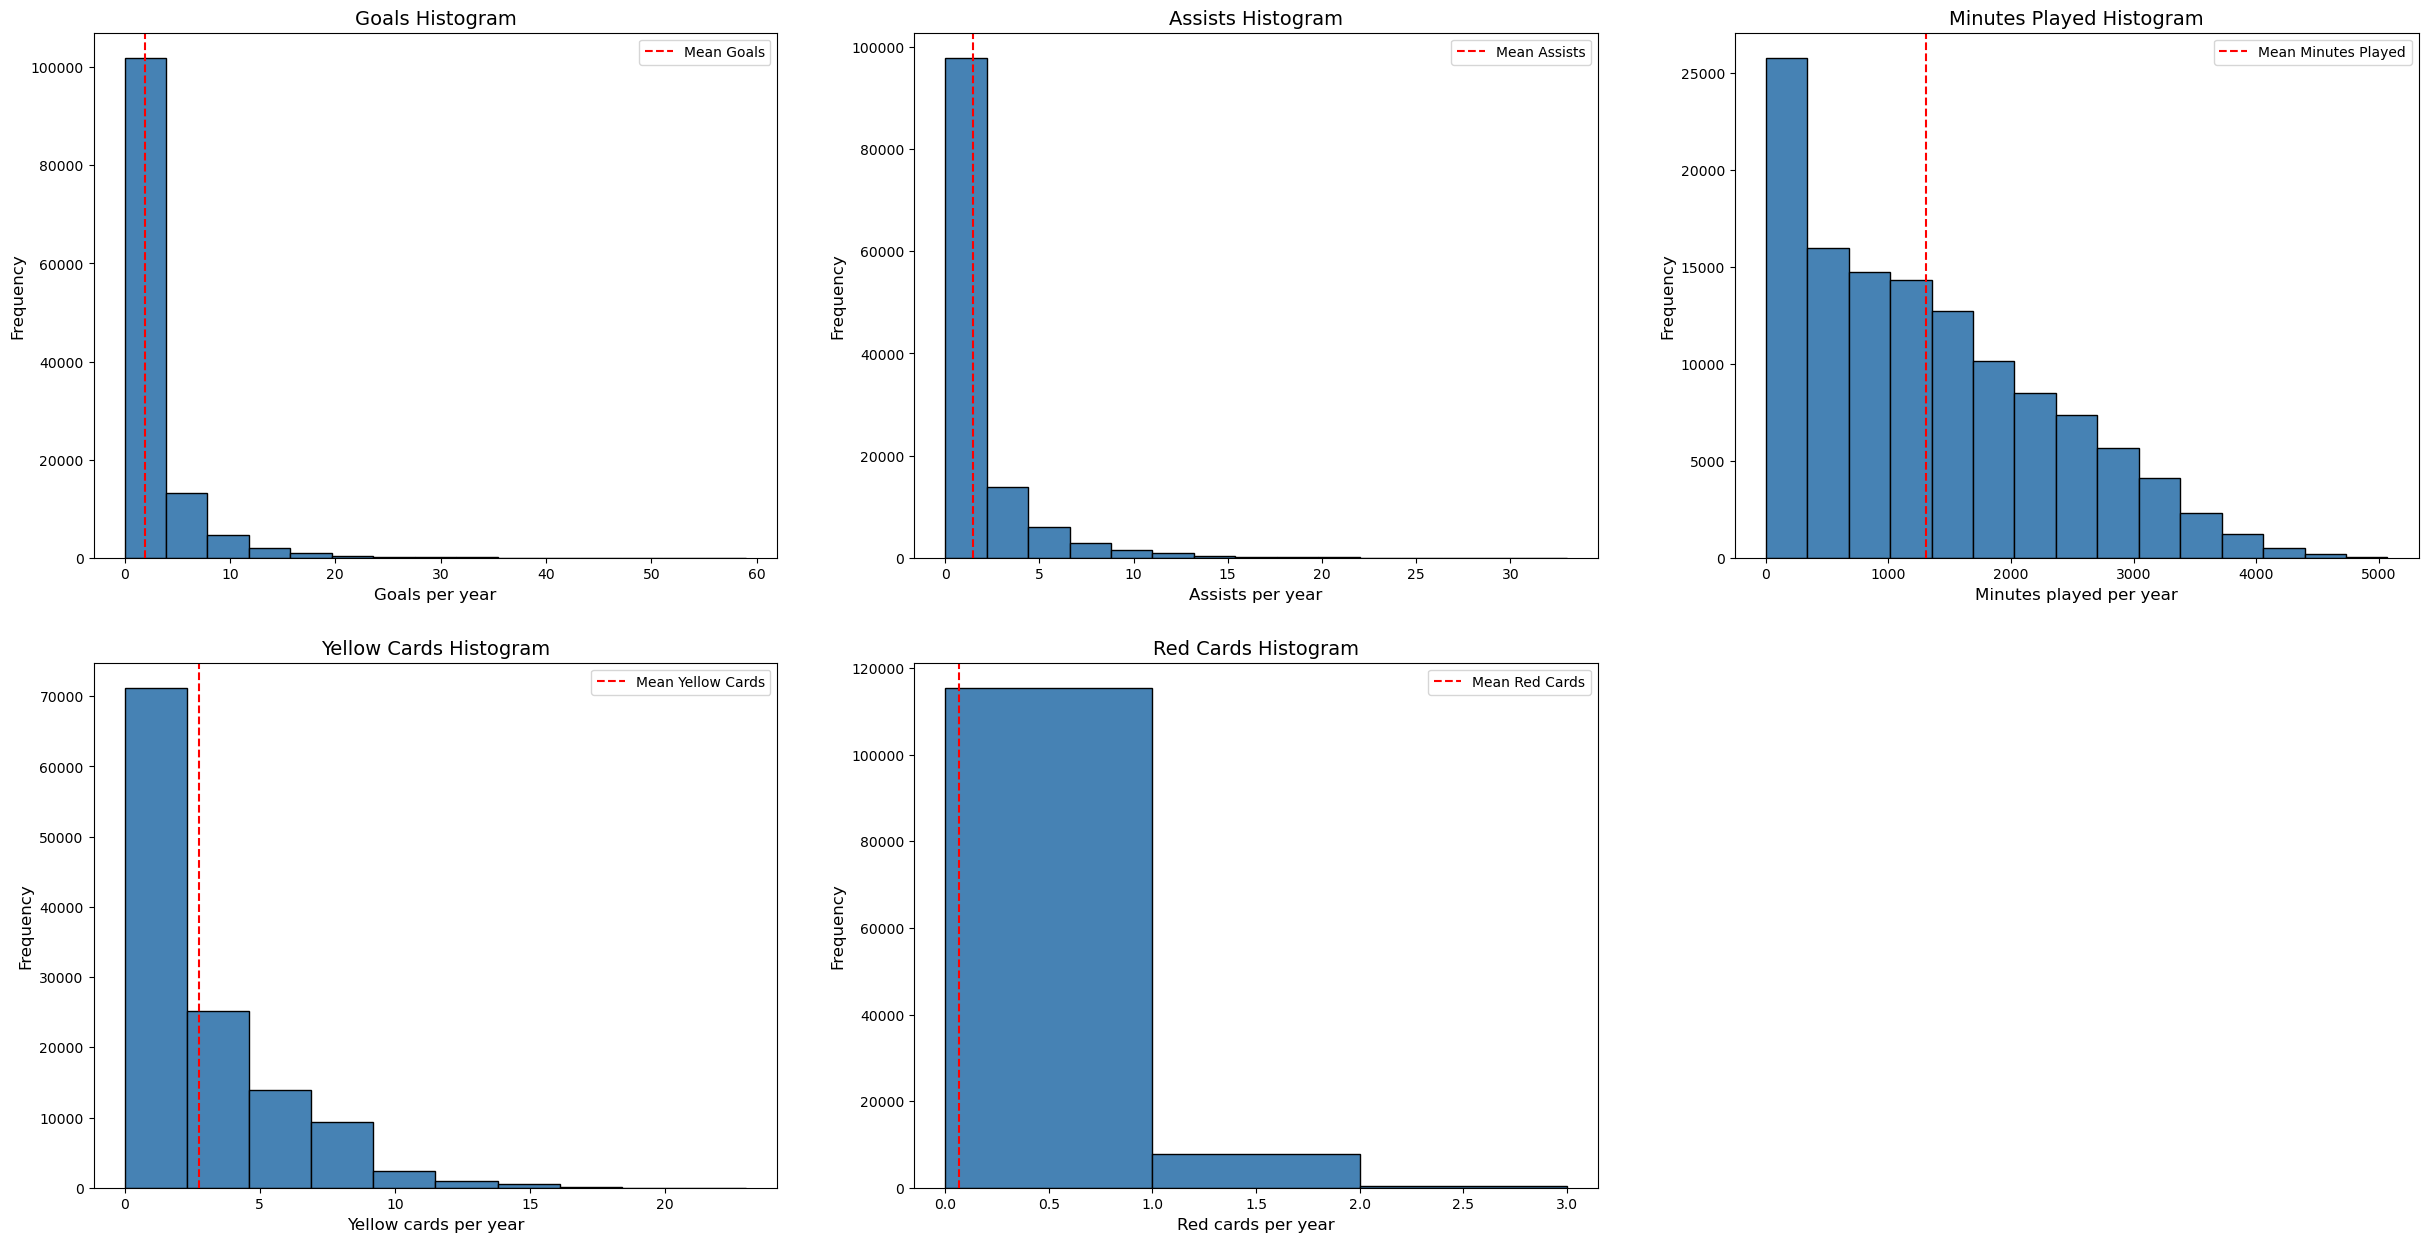

In [78]:
# make a subplot frame
plt.subplots(2, 3, figsize=(30, 15))

# goals
plt.subplot(2, 3, 1)
plt.hist(fdf3["goals"], bins=15, color="steelblue", edgecolor="black")
plt.axvline(fdf3["goals"].mean(), color="red", linestyle="--", label="Mean Goals")
plt.xlabel("Goals per year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Goals Histogram", fontsize=14)
plt.legend()

# assists
plt.subplot(2, 3, 2)
plt.hist(fdf3["assists"], bins=15, color="steelblue", edgecolor="black")
plt.axvline(fdf3["assists"].mean(), color="red", linestyle="--", label="Mean Assists")
plt.xlabel("Assists per year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Assists Histogram", fontsize=14)
plt.legend()

# minutes played
plt.subplot(2, 3, 3)
plt.hist(fdf3["minutes_played"], bins=15, color="steelblue", edgecolor="black")
plt.axvline(fdf3["minutes_played"].mean(), color="red", linestyle="--", label="Mean Minutes Played")
plt.xlabel("Minutes played per year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Minutes Played Histogram", fontsize=14)
plt.legend()

# yellow cards
plt.subplot(2, 3, 4)
plt.hist(fdf3["yellow_cards"], bins=10, color="steelblue", edgecolor="black")
plt.axvline(fdf3["yellow_cards"].mean(), color="red", linestyle="--", label="Mean Yellow Cards")
plt.xlabel("Yellow cards per year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Yellow Cards Histogram", fontsize=14)
plt.legend()

# red cards
plt.subplot(2, 3, 5)
plt.hist(fdf3["red_cards"], bins=3, color="steelblue", edgecolor="black")
plt.axvline(fdf3["red_cards"].mean(), color="red", linestyle="--", label="Mean Red Cards")
plt.xlabel("Red cards per year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Red Cards Histogram", fontsize=14)
plt.legend()

# hide last subplot
plt.subplot(2, 3, 6).axis("off")

# Show the subplots
plt.show()


We can make several observations from this subplot:
- `Goals & Assists`- The goals and assists histograms indicates that most players have quite low goals and assists counts compared to the upper echolon of goalscorers and playmakers. This suggests that goals and assists may possibly be crucial features for predicting player `market value`. The right-skewed distribution implies that a large portion of players dont contribute much in in terms of scoring and assisting, while a select few players stand out as prolific goalscorers and playmakers. In the context of predicting player valuation, these features could serve as key indicators of a player's impact and influence on the game.

- `Minutes Played` - The histogram for minutes played loosely resembles a flight of descending stairs with a similar right-skew as before but not as extreme as before. This shape sort of reflects the hierarchical system that football teams have in place for their players with starters getting the most minutes, regular substitutes getting less than them and sporadic squad players getting the least. This suggests that minutes played is a very good indicator of `market value` and will be an important feature as often times players with consistent and substantial playing time contribute significantly to their team's success, thereby influencing their market value positively.

- `Yellow & Red Cards` - Yellow and Red cards also display right-skewed distributions, indicating that players in general often aren't the subject of disciplinary actions. Majority of players get between 0-5 yellows a year with a few players, likely defensive players getting up to 10-20 yellow cards a year. Similarly, the vast majority of players in the dataset seem to get eitehr 0 or 1 red cards a year with very few getting more than that.  Although it's likely not going to be a very important feature in `market value` it could give us insight into players with a streak of bad on-field behaviour which could negatively affect their valuation and vice-versa.

### Discrete Columns

### `Nationalities`

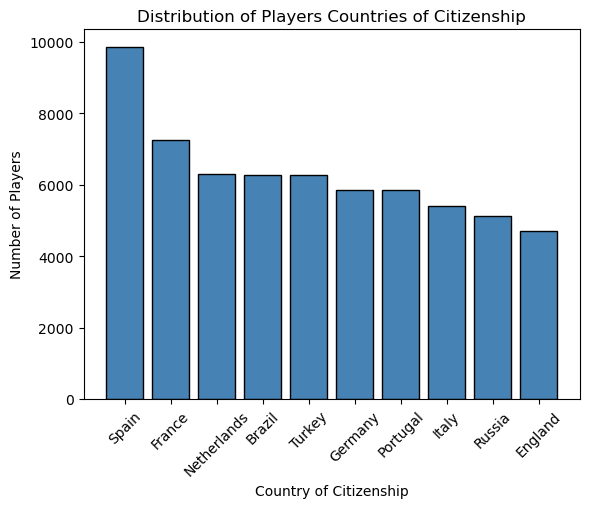

In [79]:

#group by country
country_counts = fdf3["country_of_citizenship"].value_counts()

#et the top 10
top_countries=country_counts.head(10)

#bar chart
plt.figure()
plt.bar(top_countries.index, top_countries.values, color="steelblue",edgecolor="black")
plt.title("Distribution of Players Countries of Citizenship")
plt.xlabel("Country of Citizenship")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


* The top 4 countries with the most player entries are Spain, Netherlands & Brazil which makes sense. They are all very popular footballing nations.
* There are a few surprises in this list.
* England is suprisingly low down on the list.
* Turkey and Russia are suprisingly high up on the list.

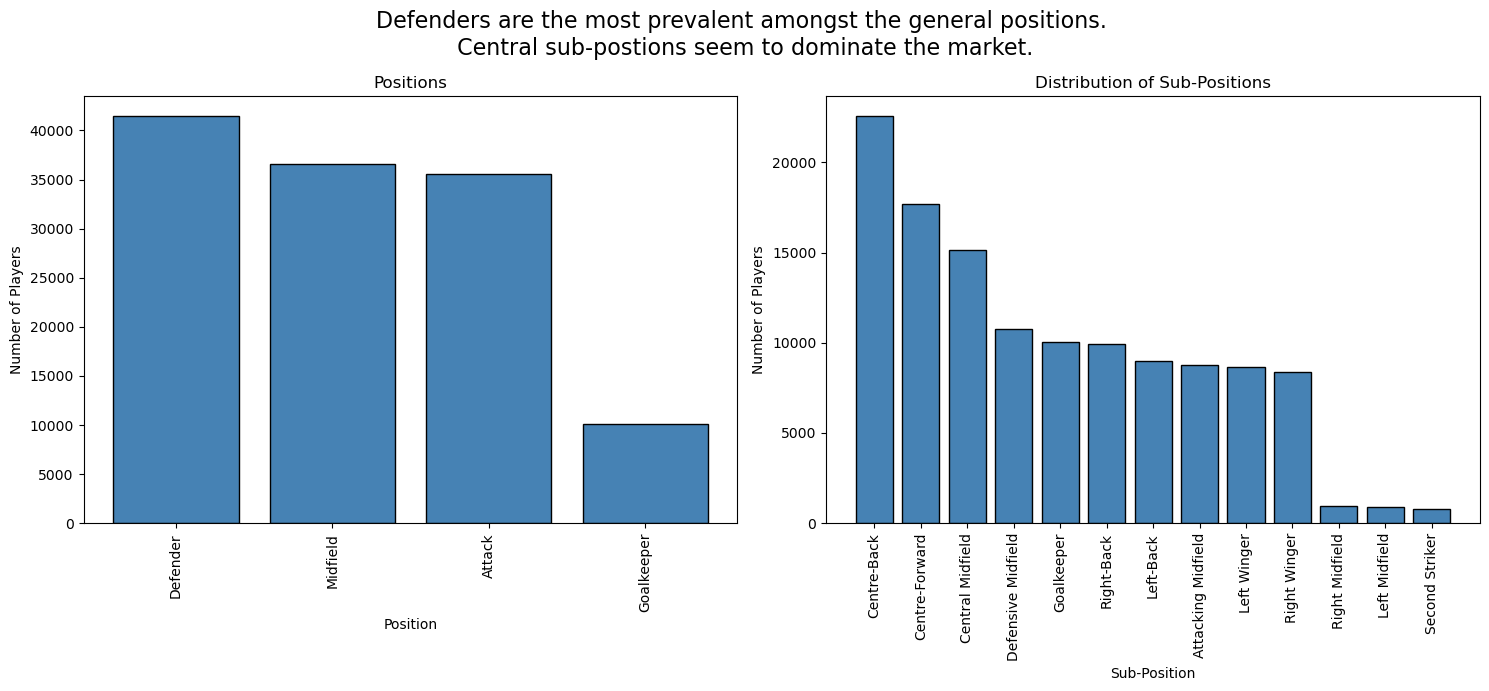

In [97]:
# make a subplot frame
plt.subplots(1,2, figsize=(15, 7))


#distribution of Sub-Positions
plt.subplot(1, 2, 1)
plt.bar(fdf3["position"].value_counts().index, fdf3["position"].value_counts(), color="steelblue",edgecolor="black")
plt.title("Positions")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)

#distribution of Positions
plt.subplot(1, 2, 2)
plt.bar(fdf3["sub_position"].value_counts().index, fdf3["sub_position"].value_counts(), color="steelblue",edgecolor="black")
plt.title("Distribution of Sub-Positions")
plt.xlabel("Sub-Position")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)

#add an overarching title
plt.suptitle("Defenders are the most prevalent amongst the general positions. \n Central sub-postions seem to dominate the market. ", fontsize=16)

plt.tight_layout()



`Position`
* Defenders are the most populous position in my dataset accounting for over 40000 entries.
* Midfielders and Attackers are very close behind defenders but fall just short.
* Goalkeepers have by far the least amount of entries in my dataset and it makes sense as teams usually only have 2-3 goalkeepers in the squad at any given time.

`Subposition`
* We can use the subposition collumn to really go into detail with this.
* Centre-backs, Centre-Forwards and Central midfielders lead here by a decent margin with Centrebacks being extremely common. The central positions really seem to dominate the market.
* Right and Left midfielders aswell as Second Strikers are very rare sub position for playrs and hence dont have many entries.

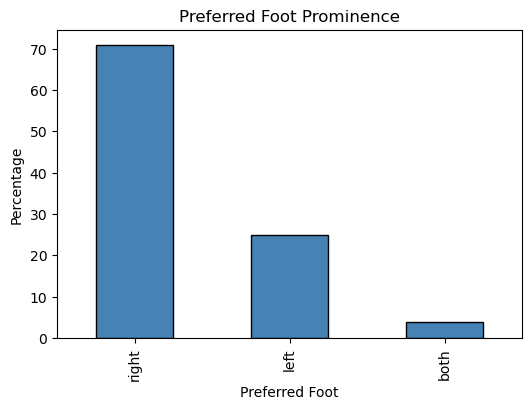

In [109]:

#set a values count for strong foot and calculate percentage
foot_counts = fdf3["foot"].value_counts()
foot_percentage = (foot_counts / foot_counts.sum()) * 100

#plot
plt.figure(figsize=(6, 4))
foot_percentage.plot(kind="bar", color="steelblue",edgecolor="black")
plt.title("Preferred Foot Prominence")
plt.xlabel("Preferred Foot")
plt.ylabel("Percentage")

plt.show()


`preferred foot`
* Right foot holds the majority of the entries in the dataset with almost 71% of players being dominantly right footed.
* Left foot on the other hand represents just above 25% of the entries in the dataset.
* Ambidextrous players are far and few between in my dataset accounting for only about 5%. These players can play with both feet, a highly valued skill in the field of football.

### Bivariate Analysis

#### Exploring correlation

In [11]:
#take an initial look into correlations
fdf3.corr()

C:\Users\moham\AppData\Local\Temp\ipykernel_18212\1952811315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fdf3.corr()


,player_id,last_season_x,most_recent_club_id,height_in_cm,market_value,highest_ever_market_value,age,contract_days_left,month,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,net_transfer_record,national_team_players
player_id,1.000000,0.251636,0.043355,-0.035371,-0.046203,-0.068817,-0.592429,0.368863,0.102530,0.486886,-0.105584,-0.118354,-0.156473,-0.034648,-0.257558,0.091113,0.043600,-0.059068
last_season_x,0.251636,1.000000,0.003195,0.059551,0.206857,0.259766,-0.024892,0.478757,0.072667,0.449494,0.133198,0.153772,0.139445,0.027477,0.248652,0.003242,-0.029177,0.239866
most_recent_club_id,0.043355,0.003195,1.000000,-0.028108,-0.117608,-0.143922,0.025936,-0.100343,0.023274,0.024629,-0.069867,-0.077205,-0.041918,-0.012439,-0.100307,0.587460,0.016508,-0.207922
height_in_cm,-0.035371,0.059551,-0.028108,1.000000,-0.011002,-0.012838,0.064005,0.044763,0.017256,0.017718,-0.052096,-0.201918,-0.016304,0.031635,0.053278,-0.018071,-0.009115,0.018335
market_value,-0.046203,0.206857,-0.117608,-0.011002,1.000000,0.803066,0.029209,0.265207,0.037947,0.071306,0.435758,0.427006,0.244392,0.044559,0.438974,-0.111263,-0.181890,0.479880
highest_ever_market_value,-0.068817,0.259766,-0.143922,-0.012838,0.803066,1.000000,-0.022764,0.327589,0.003643,-0.003951,0.429326,0.422287,0.227419,0.040596,0.413370,-0.134203,-0.164448,0.503406
age,-0.592429,-0.024892,0.025936,0.064005,0.029209,-0.022764,1.000000,-0.273547,0.065201,0.216577,0.074871,0.063046,0.158564,0.044451,0.229824,0.042501,-0.044448,0.006827
contract_days_left,0.368863,0.478757,-0.100343,0.044763,0.265207,0.327589,-0.273547,1.000000,0.050353,0.304384,0.123098,0.132870,0.081035,0.017057,0.169269,-0.061392,-0.002595,0.231080
month,0.102530,0.072667,0.023274,0.017256,0.037947,0.003643,0.065201,0.050353,1.000000,0.147809,-0.011212,-0.016124,-0.016383,-0.009827,-0.026512,0.030754,0.004673,0.010792
year,0.486886,0.449494,0.024629,0.017718,0.071306,-0.003951,0.216577,0.304384,0.147809,1.000000,-0.031355,-0.035153,-0.035984,-0.010681,-0.051746,0.099672,-0.004505,0.041329


I"ll now be setting up a heatmap of my correlations to get a better visual of how my collumns look against each other.

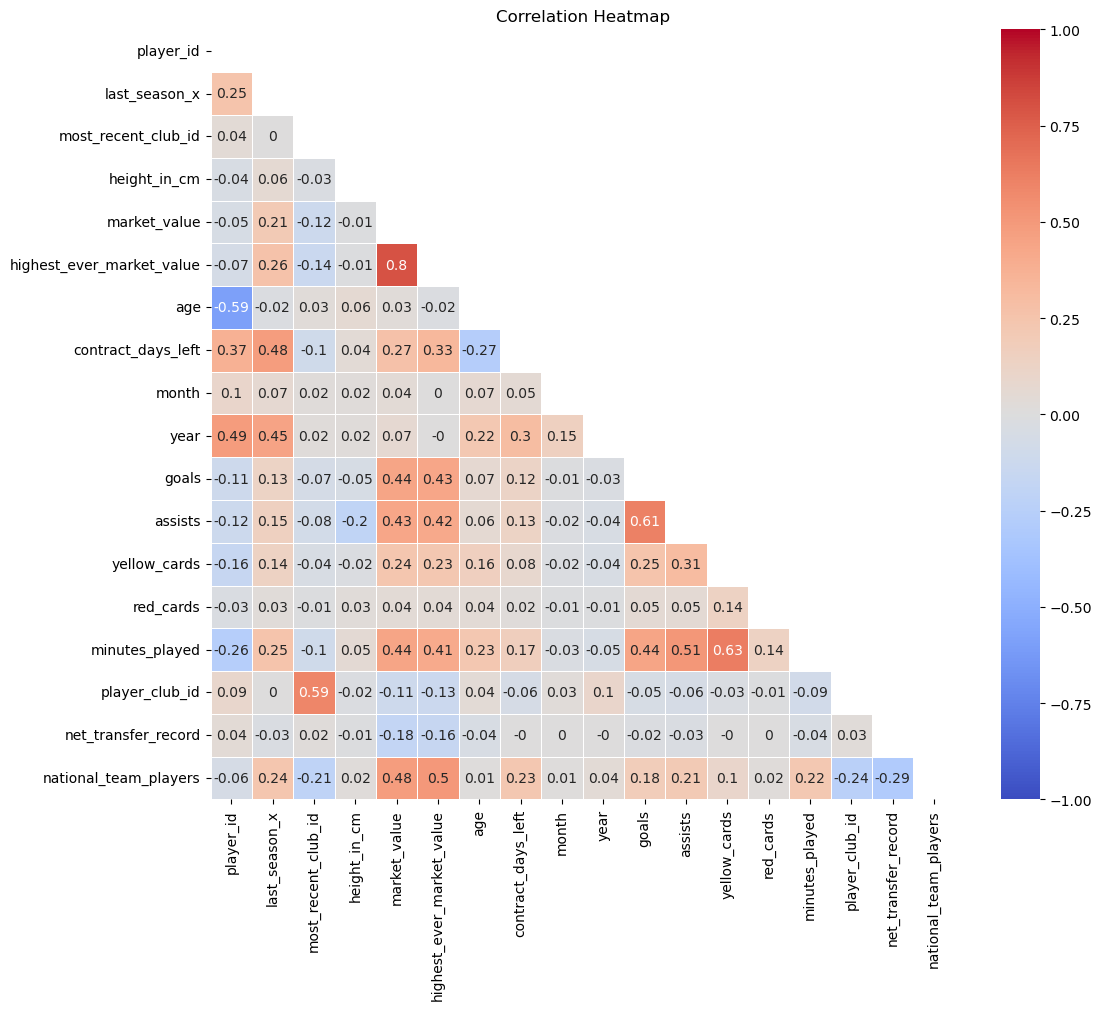

In [108]:
#create the heatmap and customize the heatmap
mask = np.triu(np.ones_like(fdf3.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(round(fdf3.corr(),2), annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1,mask=mask,linewidths=0.5)
heatmap.set_title("Correlation Heatmap")

plt.show()

##### Correlation Analysis

1. **Player Age vs. Player ID**: There"s a moderate negative correlation at -0.59. Younger players tend to have higher player IDs, indicating that player IDs are assigned sequentially or chronologically.

2. **Player Age vs. Last Season**: The correlation between age and the last season played is slightly positive at 0.02. This suggests that player age and the last season are weakly related, with age potentially increasing slightly over seasons.

3. **Player Age vs. Contract Days Left**: Age has a negative correlation at -0.27 with the number of days left in the player"s contract. Younger players tend to have more time remaining in their contracts.

4. **Year vs. Player ID**: There"s a positive correlation at 0.49 between the year and player ID. This indicates that player IDs may increase over the years, possibly due to new players joining the dataset each year.

5. **Goals vs. Assists**: The number of goals and assists have a strong positive correlation at 0.61, which makes sense since players with more goals often have more assists.

6. **Yellow Cards vs. Red Cards**: Yellow card count and red card count are positively correlated at 0.14. This means that players who receive more yellow cards are also more likely to receive red cards.

7. **Goals vs. Minutes Played**: Goals and minutes played are positively correlated at 0.45, suggesting that players who spend more time on the field tend to score more goals.

8. **Assists vs. Minutes Played**: There"s a positive correlation at 0.52 between assists and minutes played. Players with more playing time tend to provide more assists.

9. **Yellow Cards vs. Minutes Played**: Yellow cards are weakly correlated with minutes played at 0.14. Players with more playing time might accumulate more yellow cards.



**sidenote** - The `highest_ever_market_value` collumn is very highly correlated with my target variable. For my model this will be problematic as what happens when a player is being valued for the first time ? we won't always have this data so it would be best to drop it.

### Plotting Bivariate Analysis

#### Player Valuation Over The Years

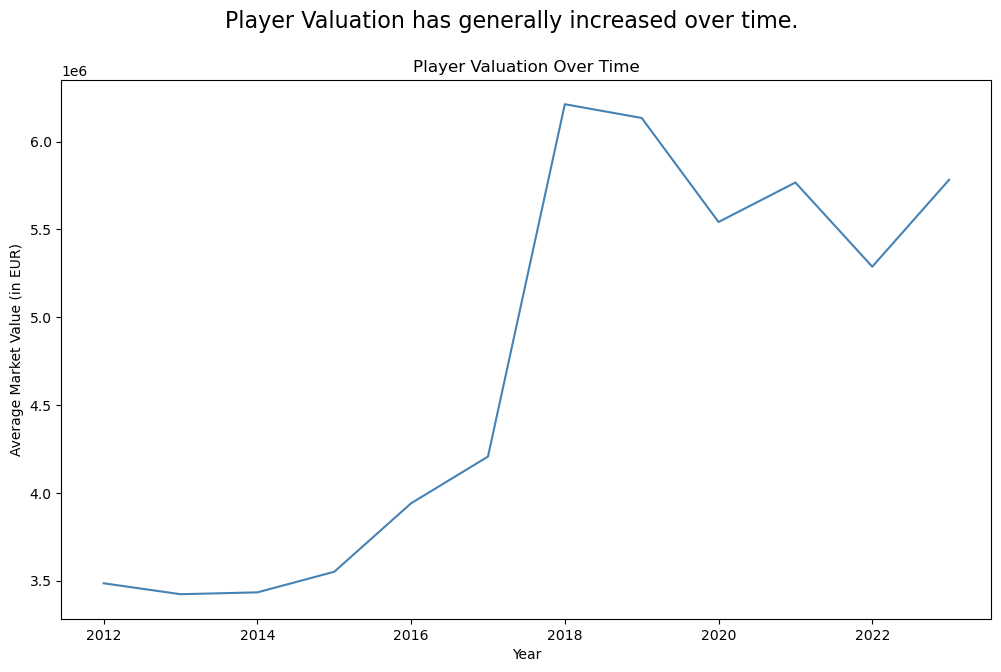

In [103]:
#group market value by year and get average
market_value_by_year = fdf3.groupby("year")["market_value"].mean()

#plot
plt.figure(figsize=(12, 7))
plt.plot(market_value_by_year.index, market_value_by_year.values, linestyle="-",color="steelblue")
plt.title("Player Valuation Over Time")
plt.xlabel("Year")
plt.ylabel("Average Market Value (in EUR)")
#add an overarching title
plt.suptitle("Player Valuation has generally increased over time.", fontsize=16)
plt.show()


`Average Player Valuations over time`
* There seemed to be a general inflation of Average Player valuations over time in the earlier years with a massive spike between 2015 and 2018 where the average player valuation almost doubled.
* There seems to have been a slight decrease since then which could be attributed to the Covid-19 pandemic in 2020 which the market has just begun to recover from.Perhaps there are underlying reasons for this fluctuating valuations throughout the years.
* Hence, The `year` feature would be a very important predictor of the player `market value`, reflecting the trends and fluctuations in the football transfer market over time.

#### Player Valuations By Position

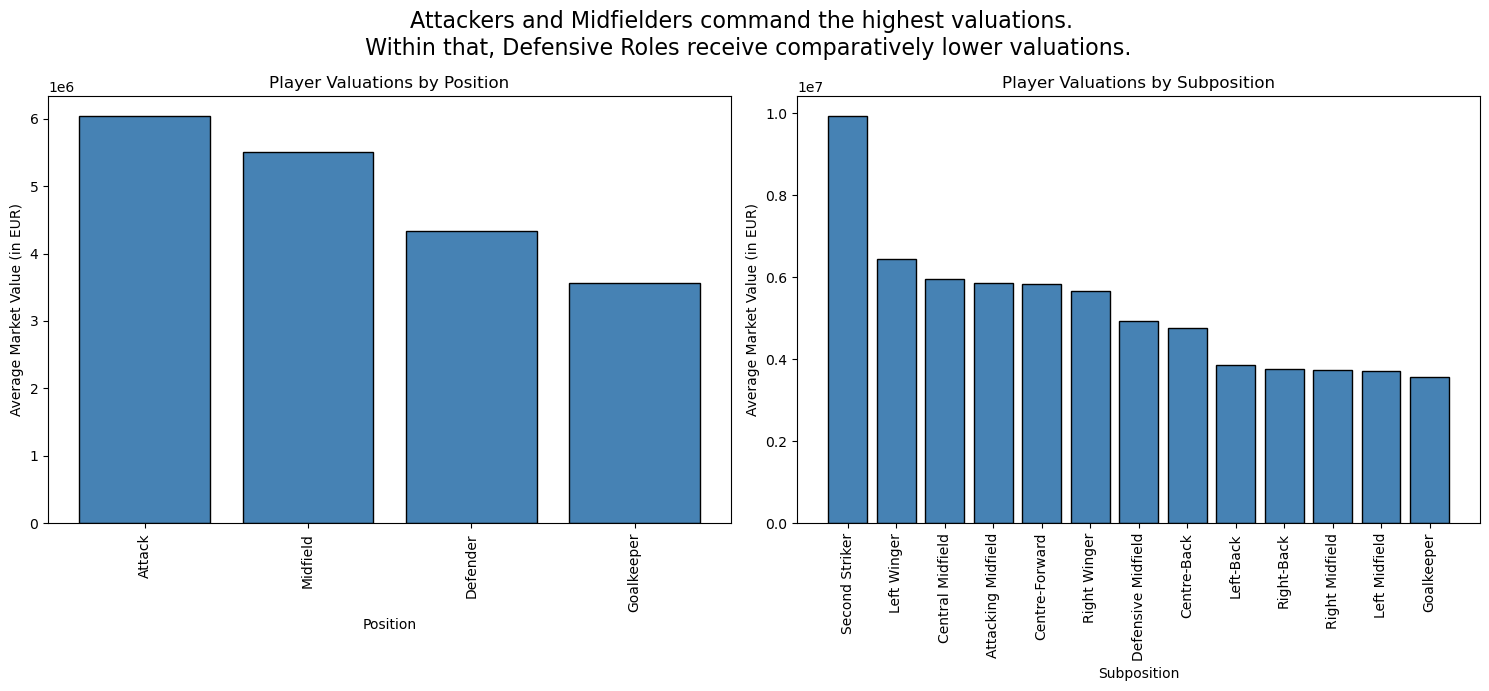

In [102]:


#group by position and subposition
position_market_value = fdf3.groupby("position")["market_value"].mean().sort_values(ascending=False)
subposition_market_value = fdf3.groupby("sub_position")["market_value"].mean().sort_values(ascending=False)

# make a subplot frame
plt.subplots(2,3, figsize=(15, 7))

#plot position
plt.subplot(1, 2, 1)
plt.bar(position_market_value.index, position_market_value.values,color="steelblue",edgecolor="black")
plt.title("Player Valuations by Position") 
plt.xlabel("Position")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#plot subpositions
plt.subplot(1, 2, 2)
plt.bar(subposition_market_value.index, subposition_market_value.values,color="steelblue",edgecolor="black")
plt.title("Player Valuations by Subposition") 
plt.xlabel("Subposition")
plt.ylabel("Average Market Value (in EUR)")
plt.xticks(rotation=90)

#add an overarching title
plt.suptitle("Attackers and Midfielders command the highest valuations. \n Within that, Defensive Roles receive comparatively lower valuations.", fontsize=16)


#display the subplots
plt.tight_layout()


`Player Valuations by Positions and Subpositions` <br>

`Position`
* attackers and midfielders generally are valued the highest at around 5-6 million (EUR)
* defenders are valued slightly lower at around 4.5 million (EUR)
* goalkeepers are valued the lowest at around 3.75 million (EUR)

`Subposition`
* There seems to be a lot of variation in valuations of players based on their subposition
* for example Second Striker is valued at almost 10 million and goalkeepers at around 3-4 million.
* The attacking roles seem to generally be more valuable than the defensive roles with 4 of the bottom 5 least valuable positions being defensive ones.

#### Player Valuations by League & Nationality

In [111]:
fdf3

,player_id,last_season_x,most_recent_club_id,country_of_citizenship,sub_position,position,foot,height_in_cm,market_value,highest_ever_market_value,...,year,goals,assists,yellow_cards,red_cards,minutes_played,player_club_id,league_id,net_transfer_record,national_team_players
10,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,2012,0,0,1,0,720,31,GB1,-111300000.0,16
11,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,2012,0,0,1,0,720,31,GB1,-111300000.0,16
12,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,2013,0,0,0,0,450,31,GB1,-111300000.0,16
13,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,2013,0,0,0,0,450,31,GB1,-111300000.0,16
14,4042,2017,234,Australia,Goalkeeper,Goalkeeper,left,194.0,1500000,2000000.0,...,2014,0,0,0,0,466,31,GB1,-111300000.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262395,371851,2023,410,Slovenia,Centre-Back,Defender,right,190.0,10000000,10000000.0,...,2023,1,2,6,0,2511,410,IT1,8560000.0,8
262405,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,2022,0,0,1,0,53,410,IT1,8560000.0,8
262406,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,2022,0,0,1,0,53,410,IT1,8560000.0,8
262407,586756,2023,410,Ireland,Right-Back,Defender,right,180.0,3500000,3500000.0,...,2023,0,1,3,0,870,410,IT1,8560000.0,8


We could plot the valuations of players by league to see how they vary.The general consensus in football is that the top 5 leagues are, in no order, GB1(England),ES1(Spain),L1(Germany),FR1(France) & IT1(Italy) so my early expectation is that they dominate.

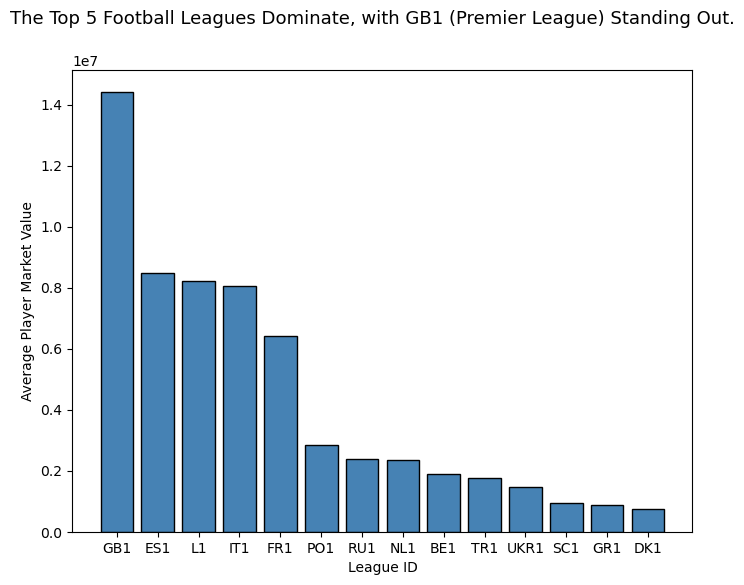

In [142]:
#group by league
leagueplayervalue=fdf3["market_value"].groupby(fdf3["league_id"]).agg("mean").sort_values(ascending=False)

#plot
plt.figure(figsize=(8,6))
plt.bar(leagueplayervalue.index,leagueplayervalue,color="steelblue",edgecolor="black")
plt.xlabel("League ID")
plt.ylabel("Average Player Market Value")

#add an overarching title
plt.suptitle("The Top 5 Football Leagues Dominate, with GB1 (Premier League) Standing Out." , fontsize=13)

plt.show()


As expected, the top 5 leagues dominate the market in terms of how valuable the  average player is with a clear gap between 5th and 6th. GB1 (Premier League) is the standout performer here with the the only average player valuation in the 10s of millions (€14,000,000). This suggests domestic leagues will be a important predictor in my model as they seem to have a quite a large influence on players market values.

In [16]:
#turn my dataset into a  to load into the next notebook
fdf3.to_csv("data1/my_dataset.csv", index=False)